# Car Insurance Profit/Loss, a Monte Carlo Simulation

In [40]:
import random
import matplotlib.pyplot as plt
from tabulate import tabulate

# Model Parameters

In [41]:
# Figures taken from - https://www.iii.org/fact-statistic/facts-statistics-auto-insurance
modelParams = {
    "balance": 0,  # first number is starting funds if you start with money in the model or not
    "memberCount": 10000,  # how many members do you have in the model
    "memberGrowthRate": 1.01,  # how much does member count grow each month (modest 5 percent)
    "monthsToModel": 12,  # how many months should the model run
    "annualInjuryRate": 1.10,  # customer percentage making personal injury claim
    "annualPropertyDamageRate": 4.0,  # customer percentage making property damage claim
    "annualCollisionRate": 6.15,  # customer percentage making collision damage claim
    "annualComprehensiveRate": 2.85  # customer percentage making comprehensive claim
}

# Model Functions

In [42]:
def generatememberlist(n):
    '''Generates list of members. Members are represented as a number which is their payment per month.
    They pay between $45 and $75 (based on their car / age etc).
    '''
    memberlist = []
    for x in range(0, n):
        memberlist.append(random.randint(55, 85))
    return memberlist


def chanceofclaimpermonth(anuualclaimpercent):
    '''Rolls the dice on a claim occuring and triggers based on the
    probabilities listed in https://www.iii.org/fact-statistic/facts-statistics-auto-insurance'''
    claimpermonth = int((anuualclaimpercent / 12) * 100)

    roll = random.randint(1, 10000)

    if roll <= claimpermonth:
        # your customer made a claim
        return True
    elif roll > claimpermonth:
        # your customer didn't make a claim
        return False


def generateclaim(claim):
    '''#generates a claims amount
    converted to aud, then removes 20% for
    excess and returns this claim figure'''

    # roughly 20% excess for each claim. Or $500. Whichever is more.
    if claim - (claim / 20 * 100) < 500:
        claim = (claim - 500)
        return claim

    claimminusexcess = claim - (claim / 20 * 100)

    return claimminusexcess


def carsim(modelParams):
    balance = modelParams["balance"]
    memberCount = modelParams["memberCount"]
    memberGrowthRate = modelParams["memberGrowthRate"]
    monthsToModel = modelParams["monthsToModel"]
    annualInjuryRate = modelParams["annualInjuryRate"]
    annualPropertyDamageRate = modelParams["annualPropertyDamageRate"]
    annualCollisionRate = modelParams["annualCollisionRate"]
    annualComprehensiveRate = modelParams["annualComprehensiveRate"]

    print("~Rory Insurance MC Model Test~")
    print("_________")
    print("\nStarting with funds of:", balance, "\nStarting member count of:", memberCount, "\nRunning for a total of;",
          monthsToModel, "months")
    print("_________")

    wX = []
    vY = []

    resultslist = []
    monthlylist = []

    removefromfunds = 0
    currentmonth = 1
    wX.append(currentmonth)
    vY.append(balance)
    plt.plot(wX, vY)

    monthlyclaimcounter = 0

    while currentmonth <= monthsToModel:
        monthlyclaimcountervalue = 0
        monthlyrevenue = 0
        claimspermonth = 0
        monthlyprofit = 0
        memberlist = generatememberlist(memberCount)

        # generate claim amounts for each member in the list
        for x in memberlist:
            balance += x
            monthlyrevenue += x

            claimsAndAmounts = [(annualInjuryRate, 21000),
                                (annualPropertyDamageRate, 5024),
                                (annualCollisionRate, 4729),
                                (annualComprehensiveRate, 1817)]

            for claimType in claimsAndAmounts:
                if chanceofclaimpermonth(claimType[0]):
                    removefromfunds = generateclaim(claimType[1])
                    monthlyclaimcountervalue += removefromfunds
                    balance -= removefromfunds
                    claimspermonth += 1

        # trim decimals
        balance = int(balance)
        monthlyrevenue = int(monthlyrevenue)
        monthlyclaimcountervalue = int(monthlyclaimcountervalue)
        monthlyprofit = monthlyrevenue - monthlyclaimcountervalue

        monthlylist = [currentmonth, "{:,}".format(memberCount), "${:,}".format(balance),
                       "${:,}".format(monthlyrevenue), "${:,}".format(monthlyclaimcountervalue),
                       "${:,}".format(monthlyprofit), claimspermonth]
        resultslist.append(monthlylist)

        # grow members by set monthly growth rate
        memberCount *= memberGrowthRate
        memberCount = int(memberCount)

        print("Month", currentmonth, "ending funds total", "${:,}".format(balance), "with Revenue of",
              "${:,}".format(monthlyrevenue), "and losses of:", "${:,}".format(monthlyclaimcountervalue), "from",
              claimspermonth, "claims")
        wX.append(currentmonth)
        vY.append(balance)
        plt.plot(wX, vY)
        currentmonth += 1

    tabulatedresults = tabulate(resultslist,
                                headers=["Month", "Members", "Total Balance", "Monthly Revenue", "Monthly Losses",
                                         "Monthly Profit", "Claims"], tablefmt="fancy_grid")

    print(tabulatedresults)

# Run Model

~Rory Insurance MC Model Test~
_________

Starting with funds of: 0 
Starting member count of: 10000 
Running for a total of; 12 months
_________
Month 1 ending funds total $137,543 with Revenue of $700,210 and losses of: $562,667 from 113 claims
Month 2 ending funds total $168,117 with Revenue of $706,597 and losses of: $676,023 from 122 claims
Month 3 ending funds total $300,771 with Revenue of $713,579 and losses of: $580,925 from 114 claims
Month 4 ending funds total $447,184 with Revenue of $720,811 and losses of: $574,398 from 126 claims
Month 5 ending funds total $620,873 with Revenue of $728,794 and losses of: $555,105 from 120 claims
Month 6 ending funds total $771,749 with Revenue of $735,883 and losses of: $585,007 from 123 claims
Month 7 ending funds total $941,478 with Revenue of $742,683 and losses of: $572,954 from 117 claims
Month 8 ending funds total $1,098,771 with Revenue of $750,299 and losses of: $593,006 from 131 claims
Month 9 ending funds total $1,237,741 with R

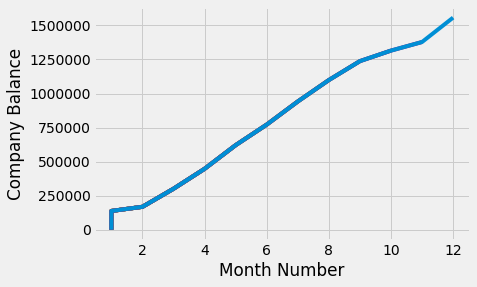

In [43]:
carsim(modelParams)

plt.ylabel("Company Balance")
plt.xlabel("Month Number")
plt.style.use('fivethirtyeight')

plt.show()

#### Rory GS 2019
rorygartonsmith@gmail.com